# Proyecto 

--------------------------------------------------------------------------------------------------------------------------------------------
### Producto:

Se va a proveer al cliente de información sobre los conocimientos y herramientas más demandads en el mercado laboral, respecto análisis de datos. Tiene una perspectiva de género en el análisi a nivel transversal.

### Objetivos:

Mejorar el bootcamp y hacerlo más competitivo en el mercado, así como conocer el perfil de los analistas de datos para continuar con la promoción de la inserción de la mujer (y otros no hombres cisgénero) en el mundo tecnológico y trabajar sobre la brecha de género.

### Preguntas de investigación:

1. ¿Cuál es el perfil de un/una analista de datos?

2. ¿En qué industrias trabaja un DA, ventajas y desventajas?

3. ¿Qué habilidades y herramientas se utilizan más?

--------------------------------------------------------------------------------------------------------------------------------------------

# Librerías

In [50]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [51]:
# Para ver todas las columnas de nuestro df
pd.options.display.max_columns = None

# Funciones para abrir los archivos y guardar como csv

### Apertura

In [52]:
def apertura_archivo (nombre_archivo):
    ruta = 'data-originales/' + nombre_archivo
    df_csv = pd.read_csv(ruta, index_col = 0)
    return df_csv

In [53]:
def apertura_xml (nombre_archivo):
    ruta = 'data-originales/' + nombre_archivo
    df_xml = pd.read_xml(ruta)
    return df_xml

In [54]:
def apertura_txt (nombre_archivo):
    ruta = 'data-originales/' + nombre_archivo
    df_txt = pd.read_csv(ruta, sep = ';')
    return df_txt

In [55]:
def apertura_db (nombre_archivo):
    ruta = 'data-originales/' + nombre_archivo
    df_db = pd.read_csv(ruta)
    return df_db

In [56]:
df_csv = apertura_archivo("00-original-data_remaning_kaggle.csv")


In [57]:
df_txt = apertura_txt("00-original-data_txt_clean.txt")


In [58]:
df_db = apertura_db('00-original-exported_db_data.csv')


In [59]:
df_xml = apertura_xml('00-original-data_xml_clean.xml')


### Guardado

In [60]:
def guardar (nombre_archivo,nombre_guardado):
    return nombre_archivo.to_csv(nombre_guardado)

# Unión de los archivos

In [61]:
def union(df_txt,df_xml,df_db,df_csv):#db,kagle, txt. xml
    df_txt.set_index("index", inplace =True)
    df_xml.set_index("index", inplace =True)
    df_db.set_index("index", inplace =True)
    df_csv.set_index("index", inplace =True)

    u_1= df_csv.join(df_db, on = "index")#txt + xml gender 
    u_2=u_1.join(df_txt, on = "index")#db Q10
    u_fin=u_2.join(df_xml, on = "index")#kaggle Q18
    return u_fin

In [62]:
df = union(df_db,df_csv,df_txt,df_xml)

In [63]:
#guardarlo en un archivo. Probar función
df.to_csv("data/05-data_union.csv")

# Unificar nombres de las columnas.
Se utilizará minusculas, con guiones bajos reemplazando a los espacios.

In [64]:
# Se trabaja sobre el documento unido
df_unido = pd.read_csv("data/05-data_union.csv", index_col=0)

##### Función para unificar los nombres de las columnas, recibe como parámetro el dataframe sobre el que queremos aplicar la unificación.

In [65]:
# Función para unificar los nombres de las columnas
# recibe como parámetro el dataframe sobre el que queremos aplicar la unificación.
def unificar_col (df): 
    lista_columnas = {col: col.strip().replace(" ", "_").lower() for col in df.columns}
    return df.rename(columns=lista_columnas, inplace=True)

In [66]:
unificar_col(df_unido)

In [67]:
df_unido.head(2)

,level_0,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platf

In [68]:
df_unido.shape

(25973, 259)

# Eliminar columnas que no necesitamos 

### Identificamos las columnas sobre las que se trabajará y las que se eliminarán

### xml (E) == ( Eliminar)

- (E)level_0	
- index	
- (E)time	
- age	
- gender

### txt (E) == ( Eliminar)

- Q1: 	Edad: Numero de años: Lista de valores. No incluída en archivo
- Q2: 	Genero: 5 Opciones.No incluída en archivo
- Q3: 	País de residencia : lista
- Q4: 	Nivel de educación: 7 opciones
- Q5: 	Ocupación actual : 14 opciones
- Q6: 	Años de experiencia codeando o programando : 7 opciones
- Q7: 	Lenguajes de programación usados: 13 opciones
- Q8: 	Lenguaje que recomendarías : 13 opciones
- Q9: 	Ambientes de desarrollo integrados: 13 opciones
- Q10:	Notebook que utilizas normalmente: 17 opciones. En archivo db
- Q11:	Tipo de plataforma: 6 opciones
- (E)Q12: 	Tipo de hardware: 6 opciones
- (E)Q13: 	TPU : 5 opciones
- Q14: 	Herramientas de visualización de datos : 12 opciones
- (E)Q15: 	Experiencia en el uso de Machine Learning : 9 opciones
- (E)Q16: 	Uso regular de Machine Frameworks: 18 opciones
- (E)Q17: 	Algoritmos de Machine learning utilizas : 12 opciones
- Q18: 	Categorías de visualización: 7 opciones. En kaggle
- Q19: 	Métodos  procesamiento de lenguaje natural: 6 opciones. En kaggle
- Q20: 	Industria en la que estas trabajando : 17 opciones
- Q21:	Tamaño e la compañía : 5 opciones
- Q22: 	Cuantas personas son analistas de datos en la compañía : 7 opciones
- (E) Q23: 	Utilizan métodos de machine learning en tu empresa y cuales : 6 opciones.
- (E)Q24: 	Actividad que son importantes para tu trabajo : 8 opciones
- Q25 : 	Cuanto ganas anualmente en dólares: Lista de valores
- Q26:Cuanto es tu presupuesto de Machine Learning y Cloud computing en los 	últimos 5 años : en dorales: 6 opciones
- Q27-A:Que plataformas de cloud computing utilizas regularmente: 12 opciones. En kaggle
- (E)Q28:Que plataforma de cloud tienes la mejor experiencia para desarrollar : 13 opciones. En kaggle
- (E)Q29-A : Utilizas normalmente algunos de los productos de cloud computing: 5 opciones. En kaggle
- (E)Q30-A: Usas normalmente de alguna data storage: 8 opciones. En kaggle
- (E)Q31-A: Utilizas regularmente alguno de los producto de managed machine learning. En kaggle
- (E)Q32-A: Producto big data que utilizas regularmente.: 21 opciones
- Q33 :	Producto de big data que utilizas regularmente solo las personas que respondieron mas de una opcion en la q32-a: 21 opciones
- (E)Q34-a: Uso regular de herramientas de inteligencia de negocios: 17 opciones
- Q35:	Cuales son las que más, Relacionada con la q34-a si tienes mas de un opción en la 34 : 17 opciones.
- (E)Q36-a : Utiliza alguna herramienta de automatización de machine learning : 8 opciones. En kaggle
- (E)Q37-a: Cuales herramientas: Relacionada con la 36-a solo las que responden SI: 8 opciones. En kaggle
- (E)Q38-a: Tiene herramientas para controlar los experimentos de manage machine learning : 12 opciones. En kaggle
- Q39 : Donde compartes tus análisis de datos y aplicaciones de machine learning : 10 opciones. En kaggle
- Q40:En que plataformas iniciaste tu formación de análisis de datos: 12 opciones. En kaggle
- Q41:Cual es la herramienta principal que utilizas en el trabajo o escuela para procesas datos: 6 opciones. En kaggle
- Q42: Cual es tu red social favorita relacionada con el data science : 12 opciones. En kaggle

#### (E) Preguntas extras : Para personas no 

- q27-b: Cual de las siguiente de cloud computing esperas familiarizarte mas en los próximos dos años : 12 opciones
- q29-b: En los próximos dos años, deseas familiarizarte más con alguna de las siguientes opciones: 5 opciones
- q30-b : En los próximos 2 años, con cuales de los siguientes data storage products deseas familiarizarte: 8 opciones
- q31-b : En los próximos 2 años, Con cuales de los siguientes productos de managed machine learning quieres familiarizarte : 10 opciones
- q32-b : En los próximos 2 años, Con cuales de los siguientes productos de big data products quieres familiarizarte : 21 opciones
- q34-b : En los próximos 2 años, Con cuales de los siguientes productos de tools bussiness intelligent quieres familiarizarte :  17 opciones
- q36-b : En los próximos 2 años, Con cuales de los siguientes productos de automated machine learning quieres familiarizarte : 8 opciones
- q37-b : En los próximos 2 años, Con cuales de los siguientes productos de automated machine learning tools quieres familiarizarte : 8 opciones
- q38-b:En los próximos 2 años, Con cuales de los siguientes productos de tools machine learning experiments quieres familiarizarte : 12 opciones

### db

- Q10_Part_1: kaggle_n
- Q10_Part_2: colab_n
- Q10_Part_3: azure_n
- Q10_Part_4: paper_space_gradient
- Q10_Part_5: binder_jupyter_hub
- Q10_Part_6: code_ocean
- Q10_Part_7: ibm_ws
- Q10_Part_8: amazon_ssn
- Q10_Part_9: amazonemr_n
- Q10_Part_10: googlec_n
- Q10_Part_11: googlec_n
- Q10_Part_12: databrickc_n
- Q10_Part_13: zeppelin_zn
- Q10_Part_14: deepnote_n
- Q10_Part_15: obs_n
- Q10_Part_16: none
- Q10_Part_17: other


# kaggle

-  (E)Unnamed: 0	
- index
    - Q18	
        - Q18_Part_1	
        - Q18_Part_2	
        - Q18_Part_3	
        - Q18_Part_4	
        - Q18_Part_5	
        - Q18_Part_6	
        - Q18_OTHER
    - Q19 : ELIMINAR
        -  (E)19_Part_1	
        -  (E)Q19_Part_2
        -  (E)Q19_Part_3	
        -  (E)Q19_Part_4	
        -  (E)Q19_Part_5	
        -  (E)Q19_OTHER	
    - Q27
        - Q27_A_Part_1	
        - Q27_A_Part_2	
        - Q27_A_Part_3	
        - Q27_A_Part_4	
        - Q27_A_Part_5	
        - Q27_A_Part_6	
        - Q27_A_Part_7	
        - Q27_A_Part_8	
        - Q27_A_Part_9	
        - Q27_A_Part_10	
        - Q27_A_Part_11	
        - Q27_A_OTHER
    - Q28  ELIMINAR
        -  (E)Q28
    - Q29  ELIMINAR
        -  (E)Q29_A_Part_1	
        -  (E)Q29_A_Part_2	
        -  (E)Q29_A_Part_3	
        -  (E)Q29_A_Part_4	
        -  (E)Q29_A_OTHER
    - Q30   ELIMINAR
        -  (E)Q30_A_Part_1	
        -  (E)Q30_A_Part_2	
        -  (E)Q30_A_Part_3	
        -  (E)Q30_A_Part_4	
        -  (E)Q30_A_Part_5	
        -  (E)Q30_A_Part_6	
        -  (E)Q30_A_Part_7	
        -  (E)Q30_A_OTHER	
    - Q31: ELIMINAR
        -  (E)Q31_A_Part_1	
        -  (E)Q31_A_Part_2	
        -  (E)Q31_A_Part_3	
        -  (E)Q31_A_Part_4	
        -  (E)Q31_A_Part_5	
        -  (E)Q31_A_Part_6	
        -  (E)Q31_A_Part_7	
        -  (E)Q31_A_Part_8	
        -  (E)Q31_A_Part_9	
        -  (E)Q31_A_OTHER
    - Q36: ELIMINAR
        -  (E)Q36_A_Part_1	
        -  (E)Q36_A_Part_2	
        -  (E)Q36_A_Part_3	
        -  (E)Q36_A_Part_4	
        -  (E)Q36_A_Part_5	
        -  (E)Q36_A_Part_6	
        -  (E)Q36_A_Part_7	
        -  (E)Q36_A_OTHER
    - Q37: ELIMINAR
        -  (E)Q37_A_Part_1	
        -  (E)Q37_A_Part_2	
        -  (E)Q37_A_Part_3	
        -  (E)Q37_A_Part_4	
        -  (E)Q37_A_Part_5	
        -  (E)Q37_A_Part_6	
        -  (E)Q37_A_Part_7	
        -  (E)Q37_A_OTHER
    - Q38: ELIMINAR
        -  (E)Q38_A_Part_1	
        -  (E)Q38_A_Part_2	
        -  (E)Q38_A_Part_3	
        -  (E)Q38_A_Part_4	
        -  (E)Q38_A_Part_5	
        -  (E)Q38_A_Part_6	
        -  (E)Q38_A_Part_7	
        -  (E)Q38_A_Part_8	
        -  (E)Q38_A_Part_9	
        -  (E)Q38_A_Part_10	
        -  (E)Q38_A_Part_11	
        -  (E)Q38_A_OTHER	
    - Q39
        - Q39_Part_1	
        - Q39_Part_2	
        - Q39_Part_3	
        - Q39_Part_4	
        - Q39_Part_5	
        - Q39_Part_6	
        - Q39_Part_7	
        - Q39_Part_8	
        - Q39_Part_9	
        - Q39_OTHER	
    - Q40
        - Q40_Part_1	
        - Q40_Part_2	
        - Q40_Part_3	
        - Q40_Part_4	
        - Q40_Part_5	
        - Q40_Part_6	
        - Q40_Part_7	
        - Q40_Part_8	
        - Q40_Part_9	
        - Q40_Part_10	
        - Q40_Part_11	
        - Q40_OTHER	
    - Q42
        - Q42_Part_1	
        - Q42_Part_2	
        - Q42_Part_3	
        - Q42_Part_4	
        - Q42_Part_5	
        - Q42_Part_6	
        - Q42_Part_7	
        - Q42_Part_8	
        - Q42_Part_9	
        - Q42_Part_10	
        - Q42_Part_11	
        - Q42_OTHER	
#### ELIMINAR (E) todas las Bs ( no profesionales)
    - Q27: ELIMINAR
        - Q27_B_Part_1	
        - Q27_B_Part_2	
        - Q27_B_Part_3	
        - Q27_B_Part_4	
        - Q27_B_Part_5	
        - Q27_B_Part_6	
        - Q27_B_Part_7	
        - Q27_B_Part_8	
        - Q27_B_Part_9	
        - Q27_B_Part_10	
        - Q27_B_Part_11	
        - Q27_B_OTHER
    - Q29: ELIMINAR
        - Q29_B_Part_1	
        - Q29_B_Part_2	
        - Q29_B_Part_3	
        - Q29_B_Part_4	
        - Q29_B_OTHER
    - Q30: ELIMINAR
        - Q30_B_Part_1	
        - Q30_B_Part_2	
        - Q30_B_Part_3	
        - Q30_B_Part_4	
        - Q30_B_Part_5	
        - Q30_B_Part_6	
        - Q30_B_Part_7	
        - Q30_B_OTHER	
    - Q31:ELIMINAR
        - Q31_B_Part_1	
        - Q31_B_Part_2	
        - Q31_B_Part_3	
        - Q31_B_Part_4	
        - Q31_B_Part_5	
        - Q31_B_Part_6	
        - Q31_B_Part_7	
        - Q31_B_Part_8	
        - Q31_B_Part_9	
        - Q31_B_OTHER
    - Q32: ELIMINAR
        - Q32_B_Part_1	
        - Q32_B_Part_2	
        - Q32_B_Part_3	
        - Q32_B_Part_4	
        - Q32_B_Part_5	
        - Q32_B_Part_6	
        - Q32_B_Part_7	
        - Q32_B_Part_8	
        - Q32_B_Part_9	
        - Q32_B_Part_10	
        - Q32_B_Part_11	
        - Q32_B_Part_12	
        - Q32_B_Part_13	
        - Q32_B_Part_14	
        - Q32_B_Part_15	
        - Q32_B_Part_16	
        - Q32_B_Part_17	
        - Q32_B_Part_18	
        - Q32_B_Part_19	
        - Q32_B_Part_20	
        - Q32_B_OTHER
    - Q34: ELIMINAR
        - Q34_B_Part_1	
        - Q34_B_Part_2	
        - Q34_B_Part_3	
        - Q34_B_Part_4	
        - Q34_B_Part_5	
        - Q34_B_Part_6	
        - Q34_B_Part_7	
        - Q34_B_Part_8	
        - Q34_B_Part_9	
        - Q34_B_Part_10	
        - Q34_B_Part_11	
        - Q34_B_Part_12	
        - Q34_B_Part_13	
        - Q34_B_Part_14	
        - Q34_B_Part_15	
        - Q34_B_Part_16	
        - Q34_B_OTHER
    - Q36: ELIMINAR
        - Q36_B_Part_1	
        - Q36_B_Part_2	
        - Q36_B_Part_3	
        - Q36_B_Part_4	
        - Q36_B_Part_5	
        - Q36_B_Part_6	
        - Q36_B_Part_7	
        - Q36_B_OTHER
    - Q37: ELIMINAR
        - Q37_B_Part_1	
        - Q37_B_Part_2	
        - Q37_B_Part_3	
        - Q37_B_Part_4	
        - Q37_B_Part_5	
        - Q37_B_Part_6	
        - Q37_B_Part_7	
        - Q37_B_OTHER
    - Q38: ELIMINAR
        - Q38_B_Part_1	
        - Q38_B_Part_2	
        - Q38_B_Part_3	
        - Q38_B_Part_4	
        - Q38_B_Part_5	
        - Q38_B_Part_6	
        - Q38_B_Part_7	
        - Q38_B_Part_8	
        - Q38_B_Part_9	
        - Q38_B_Part_10	
        - Q38_B_Part_11	
        - Q38_B_OTHER

In [69]:
# Se crea una lista con las columnas a eliminar
lista_col_eliminar=[
    'level_0',
    'time',
    "q12",
    "q13",
    "q15",
    "q16",
    "q17",
    "q23",
    "q24",
    'q19_part_1', 'q19_part_2', 'q19_part_3', 'q19_part_4', 'q19_part_5', 'q19_other',
    "q28",
    'q29_a_part_1', 'q29_a_part_2', 'q29_a_part_3', 'q29_a_part_4', 'q29_a_other',
    'q30_a_part_1', 'q30_a_part_2', 'q30_a_part_3', 'q30_a_part_4','q30_a_part_5', 'q30_a_part_6', 'q30_a_part_7', 'q30_a_other',
    'q31_a_part_1', 'q31_a_part_2', 'q31_a_part_3', 'q31_a_part_4','q31_a_part_5', 'q31_a_part_6', 'q31_a_part_7', 'q31_a_part_8','q31_a_part_9', 'q31_a_other',
    "q32",
    "q34",
    'q36_a_part_1', 'q36_a_part_2', 'q36_a_part_3', 'q36_a_part_4', 'q36_a_part_5', 'q36_a_part_6', 'q36_a_part_7', 'q36_a_other',
    'q37_a_part_1', 'q37_a_part_2', 'q37_a_part_3', 'q37_a_part_4','q37_a_part_5', 'q37_a_part_6', 'q37_a_part_7', 'q37_a_other',
    'q38_a_part_1', 'q38_a_part_2', 'q38_a_part_3', 'q38_a_part_4', 'q38_a_part_5', 'q38_a_part_6', 'q38_a_part_7', 'q38_a_part_8','q38_a_part_9', 'q38_a_part_10', 'q38_a_part_11', 'q38_a_other',
    'q27_b_part_1', 'q27_b_part_2', 'q27_b_part_3', 'q27_b_part_4','q27_b_part_5', 'q27_b_part_6', 'q27_b_part_7', 'q27_b_part_8','q27_b_part_9', 'q27_b_part_10', 'q27_b_part_11', 'q27_b_other',
    'q29_b_part_1', 'q29_b_part_2', 'q29_b_part_3', 'q29_b_part_4','q29_b_other',
    'q30_b_part_1', 'q30_b_part_2', 'q30_b_part_3', 'q30_b_part_4', 'q30_b_part_5', 'q30_b_part_6', 'q30_b_part_7', 'q30_b_other',
    'q31_b_part_1', 'q31_b_part_2', 'q31_b_part_3', 'q31_b_part_4', 'q31_b_part_5', 'q31_b_part_6', 'q31_b_part_7', 'q31_b_part_8','q31_b_part_9', 'q31_b_other', 
    'q32_b_part_1', 'q32_b_part_2', 'q32_b_part_3', 'q32_b_part_4', 'q32_b_part_5', 'q32_b_part_6', 'q32_b_part_7', 'q32_b_part_8', 'q32_b_part_9', 'q32_b_part_10','q32_b_part_11', 'q32_b_part_12', 'q32_b_part_13', 'q32_b_part_14','q32_b_part_15', 'q32_b_part_16', 'q32_b_part_17', 'q32_b_part_18', 'q32_b_part_19', 'q32_b_part_20', 'q32_b_other', 
    'q34_b_part_1', 'q34_b_part_2', 'q34_b_part_3', 'q34_b_part_4', 'q34_b_part_5', 'q34_b_part_6', 'q34_b_part_7', 'q34_b_part_8', 'q34_b_part_9', 'q34_b_part_10', 'q34_b_part_11','q34_b_part_12', 'q34_b_part_13', 'q34_b_part_14', 'q34_b_part_15','q34_b_part_16', 'q34_b_other',
    'q36_b_part_1', 'q36_b_part_2', 'q36_b_part_3', 'q36_b_part_4', 'q36_b_part_5', 'q36_b_part_6', 'q36_b_part_7', 'q36_b_other', 
    'q37_b_part_1', 'q37_b_part_2', 'q37_b_part_3', 'q37_b_part_4', 'q37_b_part_5', 'q37_b_part_6', 'q37_b_part_7', 'q37_b_other',
    'q38_b_part_1', 'q38_b_part_2', 'q38_b_part_3', 'q38_b_part_4', 'q38_b_part_5', 'q38_b_part_6', 'q38_b_part_7', 'q38_b_part_8', 'q38_b_part_9', 'q38_b_part_10', 'q38_b_part_11', 'q38_b_other'
     ]

##### Función para eliminar las columnas, recibe el df y el listado con los nombres de las columnas a eliminar.

In [70]:
# Función para eliminar las columnas
# Recibe el df y el listado con los nombres de las columnas a eliminar.

def eliminar_col (df,lista):
    df.drop(lista, axis = 1, inplace = True)

In [71]:
eliminar_col(df_unido, lista_col_eliminar)

In [72]:
df_unido.shape

(25973, 89)

In [73]:
df_unido.head(2)

,age,gender,q3,q4,q5,q6,q8,q11,q20,q21,q22,q25,q26,q33,q35,q41,q7,q9,q14,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


# Obtenemos el archivo definitivo, lo ordenamos y reflexionamos sobre renombrar las columnas

In [76]:
#PENDIENTE
columnas_nuevas = {'age':'q1_age', 'gender':'q2_gender'} 

def renombrar_colum(df, columnas_nuevas):
    df.rename(columnas_nuevas, inplace=True)
    return df

# Analisis exploratorio de los datos AUTOMATIZADO

- *descricion general* : info, describe, isnull().sum(), dtipo, shape, duplicated

In [77]:
def propiedades(df):
    print(f'La forma de nuestro df es de ', df.shape)
    print(f'Los principales estádisticos de nuestro df son', df.dtype)
    print(f'El porcentaje de nulso por columna de nuestro df es', ((df.isnull().sum() / len(df))*100))
    print(f'La info de nuestro df es', df.info())
    print(f'La descripción de las variables númericas de nuestro df es ', df.describe().T)
    print(f'La descripción de las variables categóricas de nuestro df es ', df.describe(include = 'object'))
    print(f'Los duplicados de nuestro df son ', df.duplicated())

- *descripcion por columnas* : nombre columnas columna(.columns), value_counts,unique, 

In [78]:
def descripciones(df):
    print(f'Las columnas de nuestro df es ', df.columns)
    print(f'Los valores de nuestro df son ', df.values_counts())
    print(f'Los unicos de nuestro df son', df.unique())
    print(f'La info de nuestro df es', df.info())
    print(f'LA descripción de nuestro df es ', df.describe().T)

In [79]:
#REVISAR CON EDA
# def descolumna (df,col):
# print(f'Los valores de la columna  son ', df[col].values())# no se si se puede hacer asi
#  print(f'Los unicos de nuestro df son', df[col].unique())# lo mismo que antes

# LIMPIEZA 

---------------------------------------------------------------------------------------------------------------------------------------------
# PREGUNTAS

## Desagrupar : Dividir las columnas que estan juntas las opciones.
 - Columnas : q7_l_usados, q9_adi, q14_visualizacion,

### 1. Función para separar los datos múltiples

In [80]:
# Creamos una copia del df para no modificar el df de trabajo
df_nuevo = df_unido.copy()

In [81]:
def separar(df,col,col2):
    df[col2] = df[col].str.split(",")
    x = df[col2].tolist()

    set1 = set() #Creamos un set para que no salgan los contenidos repetidos

    for lista in x:
        try:
            for herramienta in lista:
                herramienta = herramienta.strip()
                set1.add(herramienta)
        except:
            pass
    lista_columnas_nuevas = list(set1)

    return lista_columnas_nuevas

In [82]:
# Creamos la lista
lista_lutilizados = separar(df_nuevo,'q7','q7_2')

In [83]:
# Comprobamos la lista
lista_lutilizados[:10]

['MATLAB',
 'Bash',
 'C++',
 'Python',
 'Java',
 'Swift',
 'R',
 'Javascript',
 'None',
 'C']

In [84]:
df_nuevo["q7_2"]

index
0                              [Python,  R]
1                   [ SQL,  C,  C++,  Java]
2                     [Python,  C++,  Java]
3                                  [Python]
4                     [Python,  C,  MATLAB]
                        ...                
25968    [Python,  SQL,  Javascript,  Bash]
25969                              [Python]
25970                                   NaN
25971                        [Python,  SQL]
25972                                   NaN
Name: q7_2, Length: 25973, dtype: object

### 2. For para crear las columnas con true or false

In [85]:
for i in lista_lutilizados: # recibe como parámero la lista resultado de la función 1. separar
    try:
        df_nuevo[i] = df_nuevo['q7'].str.contains(i)
    except:
        df_nuevo[i] = df_nuevo['q7'].str.contains(re.escape(" C++"), i)

In [86]:
df_nuevo[df_nuevo.columns[90:]]

,MATLAB,Bash,C++,Python,Java,Swift,R,Javascript,None,C,Other,Julia,SQL
index,,,,,,,,,,,,,
0,False,False,False,True,False,False,True,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,True,False,False,True
2,False,False,True,True,True,False,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,False,True,False,True,True,False,False,True,False,False,False,False,True
25969,False,False,False,True,False,False,False,False,False,False,False,False,False
25970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Agrupar : Unir las partes que nos hagan falta para responder a las preguntas

- Columnas: Q10, Q18, Q27, Q39,Q40,Q42

 - Otras columnas a revisar: q25 (salario), q26 (presupuesto en ML y Cloud)

In [87]:
lista_q_10 = ['q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other']

In [88]:
lista_q_18 = ['q18_part_1', 'q18_part_2', 'q18_part_3', 'q18_part_4', 'q18_part_5',
       'q18_part_6', 'q18_other']

In [89]:
lista_q_27 = ['q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other']

In [90]:
lista_q_39 = ['q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other']

In [91]:
lista_q_40 = ['q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other']

In [92]:
lista_q_42 = ['q42_part_1', 'q42_part_2', 'q42_part_3', 'q42_part_4', 'q42_part_5',
       'q42_part_6', 'q42_part_7', 'q42_part_8', 'q42_part_9', 'q42_part_10',
       'q42_part_11']

In [93]:
# Crear df con lista de preguntas
df_q10 = df_nuevo[['q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other']]
       
df_q10.head(2)

,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other
index,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graficos

### Función para generar el df a graficar

In [94]:
def crear_df(df,df_nuevo): # La función recibe el nombre del dataframe sobre el que trabajamos y en string otro nombre para una variable dataframe

    df_nuevo = df.melt(value_vars = df.columns)
    df_nuevo = df_nuevo[df_nuevo['value']==True].reset_index()
    df_agrup = df_nuevo.groupby(['variable'])['value'].count().reset_index()
    df_ordenado = df_agrup.sort_values('value', ascending = False)
    df_def = df_ordenado.drop_duplicates('value', keep = 'last')

    return df_def

In [95]:
# Se debe crear un dataframe
df_lutilizado = crear_df(df_nuevo,"df_lutilizado")
df_lutilizado

,variable,value
9,Python,21860
11,SQL,10756
1,C,7460
3,Java,7317
2,C++,5535
10,R,5334
4,Javascript,4332
6,MATLAB,2935
8,Other,2575
0,Bash,2216


In [96]:
def graficar_barplot (df): # La función recibe el dataframe creado para graficar
    sns.barplot(data = df, y='variable', x = 'value');

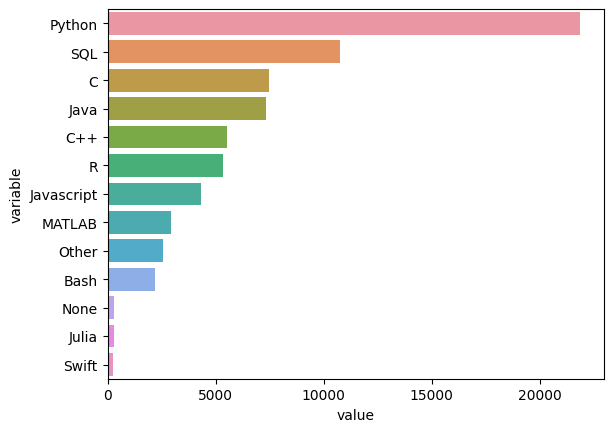

In [97]:
graficar_barplot(df_lutilizado)

Quedamos pendientes de comparar estos resultados (este grafico es a nivel de todos los puestos tech evaluados en la encuesta, debriamos eliminar DA) y comparando luego con este eliminado.  

# Análisis de los resultados

Perfil de analista

Industria donde trabajan

Herramientas que utilizan